# Using Python and Auto ARIMA to Forecast Seasonal Time Series

#### Time Series data is experimental data that has been observed at different points in time (usually evenly spaced, like once a day). For example, the data of airline ticket sales per day is a time series.
Time Series have several key features such as trend, seasonality, and noise.

#### Loading the data

#### The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

#### Processing the Data

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd

#### Frequency is Monthly

In [3]:
data = pd.read_csv('D:/Ravi/Ruma/Python Practice/Timeseries Datasets/Electric_Production.csv',index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 1939-01-01 to 2019-01-01
Data columns (total 1 columns):
IPG2211A2N    961 non-null float64
dtypes: float64(1)
memory usage: 15.0+ KB


In [5]:
data.index = pd.to_datetime(data.index)

#### Remaining the data column

In [6]:
data.columns = ['Energy Production']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 961 entries, 1939-01-01 to 2019-01-01
Data columns (total 1 columns):
Energy Production    961 non-null float64
dtypes: float64(1)
memory usage: 15.0 KB


In [8]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


#### Any null value

In [9]:
data.isnull().values.any()

False

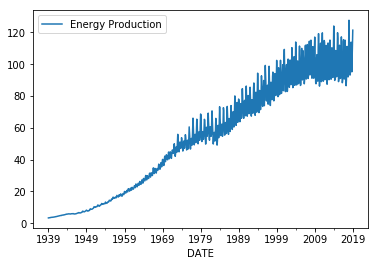

In [10]:
from matplotlib import pyplot
data.plot()
pyplot.show()

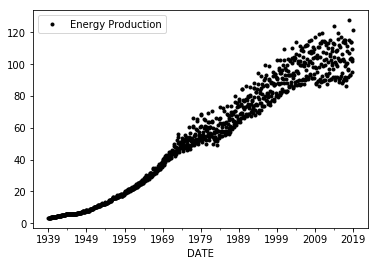

In [11]:
data.plot(style='k.')
pyplot.show()

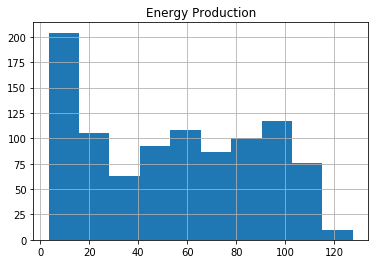

In [12]:
data.hist()
pyplot.show()

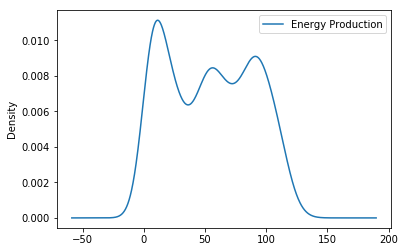

In [13]:
data.plot(kind='kde')
pyplot.show()

In [14]:
import plotly

In [15]:
plotly.tools.set_credentials_file(username='rumasinha', api_key='csZ3g0sXXP9qSKQ1S4Rv')

In [16]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

'https://plot.ly/~rumasinha/16'

In [17]:
from pyramid.arima import auto_arima

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [18]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3779.699, BIC=3803.971, Fit time=4.401 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4287.190, BIC=4296.899, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4113.925, BIC=4133.342, Fit time=0.768 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3900.880, BIC=3920.298, Fit time=1.130 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3779.352, BIC=3808.478, Fit time=3.986 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3952.283, BIC=3976.555, Fit time=1.987 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3771.723, BIC=3805.704, Fit time=13.089 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3894.224, BIC=3923.351, Fit time=6.600 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3768.788, BIC=3807.622, Fit time=13.953 seconds
Fit ARIMA: order=(2, 1, 0)

#### Train Test Split

In [19]:
stepwise_model.aic()

3730.913600106326

In [20]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 961 entries, 1939-01-01 to 2019-01-01
Data columns (total 1 columns):
Energy Production    961 non-null float64
dtypes: float64(1)
memory usage: 15.0 KB


In [22]:
train = data.loc['1985-01-01':'2016-12-01']

In [23]:
train.tail()

,Energy Production
DATE,
2016-08-01,115.4804
2016-09-01,102.1828
2016-10-01,90.6927
2016-11-01,92.2734
2016-12-01,113.2596


In [24]:
test = data.loc['2017-01-01':]

In [25]:
test.head()

,Energy Production
DATE,
2017-01-01,115.1100
2017-02-01,98.7900
2017-03-01,100.3838
2017-04-01,86.5178
2017-05-01,90.2272


In [26]:
test.tail()

,Energy Production
DATE,
2018-09-01,101.8547
2018-10-01,95.2305
2018-11-01,103.0793
2018-12-01,109.6659
2019-01-01,121.4272


In [27]:
len(test)

25

In [28]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

#### Evaluation
Now that the model has been fitted to the training data, we can forecast into the future. Recall that our test data set is from 2015–01–01 all the way to 2018–01–01. So if we check the length of our test data we get 37 rows, or 37 time periods. That is the value we will use for our .predict() method call:

In [29]:
future_forecast = stepwise_model.predict(n_periods=25)

In [30]:
#Array of predictions
print(future_forecast)

[121.06250453 109.09624612  99.33131074  89.40449256  91.16904688
 102.58802883 112.64524673 111.86455386 100.2167049   90.95109275
  94.76677366 110.70871396 119.69239042 109.74599432 100.68908265
  89.24756244  91.15353405 102.06767697 111.73942998 110.46181618
  99.91768411  90.9318941   95.1957279  108.78488359 119.15238174]


#### Let’s reorganize this set of predictions by creating a dataframe that contains our future forecast and then concatenating that with the original data.

We can then plot this to view how well our prediction forecast matched up with the test set for which we have the real data:

In [31]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
future_forecast.head()

,Prediction
DATE,
2017-01-01,121.062505
2017-02-01,109.096246
2017-03-01,99.331311
2017-04-01,89.404493
2017-05-01,91.169047


In [32]:
test.head()

,Energy Production
DATE,
2017-01-01,115.1100
2017-02-01,98.7900
2017-03-01,100.3838
2017-04-01,86.5178
2017-05-01,90.2272


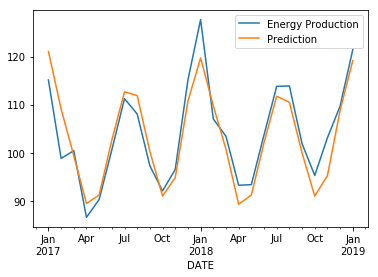

In [33]:
pd.concat([test,future_forecast],axis=1).plot()
pyplot.show()

#### We can also just compare this to the entire data set to get a larger picture of the context of our prediction.

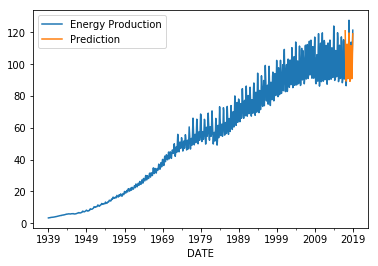

In [34]:
pd.concat([data,future_forecast],axis=1).plot()
pyplot.show()